# Multiclass Classification


In [39]:
import numpy as np
import matplotlib.pylab as plt 
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_multiclass_TF import *

### Create data

In [15]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0

X_train , y_train = make_blobs(n_samples=150, centers=centers, cluster_std=std, random_state=30)

### Training Data Visualization

Text(0.5, 0, 'Feature 1')

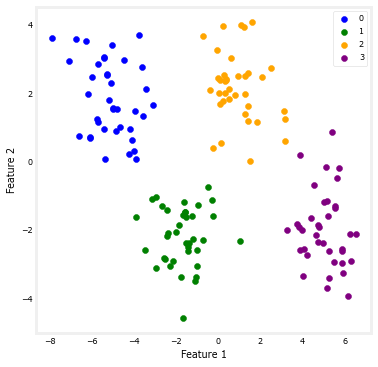

In [49]:
num0 = y_train == 0 
num1 = y_train == 1
num2 = y_train == 2
num3 = y_train == 3

fig, ax = plt.subplots(1, 1, figsize=(6,6))

ax.scatter(X_train[num0, 0],X_train[num0, 1], c="b", label="0")
ax.scatter(X_train[num1, 0],X_train[num1, 1], c="g", label="1")
ax.scatter(X_train[num2, 0],X_train[num2, 1], c="orange", label="2")
ax.scatter(X_train[num3, 0],X_train[num3, 1], c="purple", label="3");

plt.legend(loc="upper right")

plt.ylabel('Feature 2') 
# Set the x-axis label
plt.xlabel('Feature 1') 



In [17]:
np.unique(y_train)

array([0, 1, 2, 3])

## model


In [18]:
model = Sequential(
    [
    Dense(2, activation='relu', name="L1"),
    Dense(4, activation='linear', name='L2')
    ]
)

In [19]:
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(.01)

)

model.fit(
    X_train, y_train,
    epochs=200
)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 1.7552
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4778
Epoch 3/200
5/5 [==============================] - 0s 0s/step - loss: 1.3015
Epoch 4/200
5/5 [==============================] - 0s 960us/step - loss: 1.1739
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0929
Epoch 6/200
5/5 [==============================] - 0s 0s/step - loss: 1.0400
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.9889
Epoch 8/200
5/5 [==============================] - 0s 0s/step - loss: 0.9456
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.9029
Epoch 10/200
5/5 [==============================] - 0s 0s/step - loss: 0.8654
Epoch 11/200
5/5 [==============================] - 0s 860us/step - loss: 0.8259
Epoch 12/200
5/5 [==============================] - 0s 0s/step - loss: 0.7903
Epoch 13/200
5/5 [==============================] - 0s 899us/s

5/5 [==============================] - 0s 0s/step - loss: 0.0580
Epoch 105/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0575
Epoch 106/200
5/5 [==============================] - 0s 999us/step - loss: 0.0568
Epoch 107/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0562
Epoch 108/200
5/5 [==============================] - 0s 0s/step - loss: 0.0561
Epoch 109/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 110/200
5/5 [==============================] - 0s 0s/step - loss: 0.0551
Epoch 111/200
5/5 [==============================] - 0s 0s/step - loss: 0.0539
Epoch 112/200
5/5 [==============================] - 0s 849us/step - loss: 0.0533
Epoch 113/200
5/5 [==============================] - 0s 0s/step - loss: 0.0528
Epoch 114/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0526
Epoch 115/200
5/5 [==============================] - 0s 0s/step - loss: 0.0519
Epoch 116/200
5/5 [==============================] - 0s 

## Get Weights

In [20]:
l1 = model.get_layer("L1")
w1,b1 = l1.get_weights()
w1, b1

(array([[ 0.65,  1.41],
        [-2.5 ,  0.37]], dtype=float32),
 array([1.62, 1.86], dtype=float32))

In [23]:
x2 = (-x1 * w1[0,0] - b1[0]) / w1[1,0]
x4 = (-x3 * w1[1,0] - b1[1]) / w1[1,1]

1.6193247

In [24]:
l2 = model.get_layer("L2")
w2,b2 = l2.get_weights()
w2, b2

(array([[-1.99,  1.21, -1.74,  0.16],
        [-3.46, -2.06,  1.13,  0.86]], dtype=float32),
 array([ 4.01, -0.96,  0.17, -3.12], dtype=float32))

## Output of layer 1 

In [25]:
a_1 = np.maximum(0, np.dot(X_train, w1) + b1) #output of layer 1
a_1[:4]

array([[0.  , 6.77],
       [0.  , 0.  ],
       [3.14, 0.  ],
       [6.28, 7.97]])

In [26]:
X_train[:4]

array([[ 3.1 ,  1.46],
       [-7.9 ,  3.62],
       [-2.66, -1.3 ],
       [ 4.53, -0.69]])

## Output of layer 2

In [27]:
a_2 = np.dot(a_1, w2) + b2  # output of layer 2
print(a_2[:4])

# same result 
op = model.predict(X_train)
op[:4]

[[-19.38 -14.86   7.84   2.72]
 [  4.01  -0.96   0.17  -3.12]
 [ -2.23   2.84  -5.27  -2.62]
 [-36.07  -9.74  -1.71   4.77]]
5/5 [==============================] - 0s 1ms/step


array([[-19.38, -14.86,   7.84,   2.72],
       [  4.01,  -0.96,   0.17,  -3.12],
       [ -2.23,   2.84,  -5.27,  -2.62],
       [-36.07,  -9.74,  -1.71,   4.77]], dtype=float32)

# Visualization 

197/197 [==============================] - 0s 762us/step


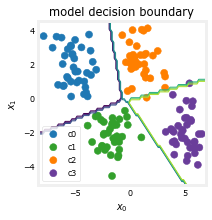

In [40]:
plt_cat_mc(X_train, y_train, model, classes= 4) 

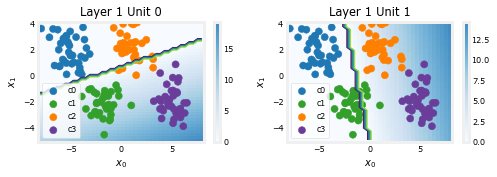

In [43]:
plt_layer_relu(X_train, y_train.reshape(-1,), w1, b1, classes=4)

In [50]:
n = 7
for i in range(n):
    print(f"   a_1 = {a_1[i]}  => category: {np.argmax(a_2[i])} => actual category: {y_train[i]}")

   a_1 = [0.   6.77]  => category: 2 => actual category: 2
   a_1 = [0. 0.]  => category: 0 => actual category: 0
   a_1 = [3.14 0.  ]  => category: 1 => actual category: 1
   a_1 = [6.28 7.97]  => category: 3 => actual category: 3
   a_1 = [14.22  7.74]  => category: 3 => actual category: 3
   a_1 = [0.   4.15]  => category: 2 => actual category: 2
   a_1 = [0. 0.]  => category: 0 => actual category: 0


# Conclusion 

## you can see at layer 1 if 

### neuron 0 = 0 and neuron 1 = 0  => reault is 0
### neuron 0 = 1 and neuron 1 = 0  => reault is 1
### neuron 0 = 0 and neuron 1 = 1  => reault is 2
### neuron 0 = 1 and neuron 1 = 1  => reault is 3


# Test  training data 

In [53]:
model_predict = model.predict(X_train)
model_predict[:4]

5/5 [==============================] - 0s 753us/step


array([[-19.38, -14.86,   7.84,   2.72],
       [  4.01,  -0.96,   0.17,  -3.12],
       [ -2.23,   2.84,  -5.27,  -2.62],
       [-36.07,  -9.74,  -1.71,   4.77]], dtype=float32)

In [70]:
n = 7
for i in range(n):
    print(f"a_2 = {model_predict[i]}  => category: {np.argmax(model_predict[i])} => actual category: {y_train[i]}")

a_2 = [-19.38 -14.86   7.84   2.72]  => category: 2 => actual category: 2
a_2 = [ 4.01 -0.96  0.17 -3.12]  => category: 0 => actual category: 0
a_2 = [-2.23  2.84 -5.27 -2.62]  => category: 1 => actual category: 1
a_2 = [-36.07  -9.74  -1.71   4.77]  => category: 3 => actual category: 3
a_2 = [-51.06   0.32 -15.75   5.83]  => category: 3 => actual category: 3
a_2 = [-10.34  -9.49   4.88   0.46]  => category: 2 => actual category: 2
a_2 = [ 4.01 -0.96  0.17 -3.12]  => category: 0 => actual category: 0


In [61]:
pred_train = np.zeros(len(y_train), dtype=int)
for j in range(len(y_train)):
    pred_train[j] = np.argmax(model_predict[j])


In [60]:
pred_train[:10], y_train

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1])

## Evaluate Training

In [63]:
(pred_train == y_train).sum()

148

# Test using unseen data 

In [64]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0

X_test , y_test = make_blobs(n_samples=20, centers=centers, cluster_std=std, random_state=30)

In [65]:
test_data = model.predict(X_test)
test_data[:4]

1/1 [==============================] - 0s 21ms/step


array([[  4.01,  -0.96,   0.17,  -3.12],
       [-57.73,  -0.89, -16.32,   7.1 ],
       [ -9.22,  -8.82,   4.51,   0.18],
       [  4.01,  -0.96,   0.17,  -3.12]], dtype=float32)

In [66]:
n = 7
for i in range(n):
    print(f"{test_data[i]}, category: {np.argmax(test_data[i])}, actual category: {y_test[i]}")

[ 4.01 -0.96  0.17 -3.12], category: 0, actual category: 0
[-57.73  -0.89 -16.32   7.1 ], category: 3, actual category: 3
[-9.22 -8.82  4.51  0.18], category: 2, actual category: 2
[ 4.01 -0.96  0.17 -3.12], category: 0, actual category: 0
[-3.54  3.63 -6.41 -2.52], category: 1, actual category: 1
[-52.63  -3.56 -12.29   6.64], category: 3, actual category: 3
[ 4.01 -0.96  0.17 -3.12], category: 0, actual category: 0


## Check that X_test not exist in  X_train 

In [67]:
(X_train[:4]== X_test[:4]).sum() 

0

## Evaluate test 

In [68]:
pred_test = np.zeros(len(y_test), dtype=int)
for j in range(len(y_test)):
    pred_test[j] = np.argmax(test_data[j])


In [69]:
true_prediction_test = (pred_test == y_test).sum()
true_prediction_test

19